<a href="https://colab.research.google.com/github/Junseokee/Jeonju/blob/main/ImageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import io
from glob import glob
from zipfile import ZipFile
import pandas as pd
import requests
import tensorflow as tf

In [9]:
cd '/content/drive/MyDrive/전주해커톤/[원본]이미지_사운드매칭_cycle50'

/content/drive/MyDrive/전주해커톤/[원본]이미지_사운드매칭_cycle50


In [10]:
!pwd

/content/drive/MyDrive/전주해커톤/[원본]이미지_사운드매칭_cycle50


In [11]:
from glob import glob

file_path = glob('./이미지/원천데이터/*/**/',recursive=True)
print(file_path)

['./이미지/원천데이터/깎기/', './이미지/원천데이터/깎기/사과/', './이미지/원천데이터/깎기/감자/', './이미지/원천데이터/깎기/배/', './이미지/원천데이터/깎기/고구마/', './이미지/원천데이터/냉장고 사용/', './이미지/원천데이터/냉장고 사용/냉장고/', './이미지/원천데이터/골프 치기/', './이미지/원천데이터/골프 치기/골프/', './이미지/원천데이터/경고음/', './이미지/원천데이터/경고음/철길 건널목/', './이미지/원천데이터/경고음/구급차/', './이미지/원천데이터/다듬이질/', './이미지/원천데이터/다듬이질/다듬잇돌/', './이미지/원천데이터/경운기 작업/', './이미지/원천데이터/경운기 작업/시동/', './이미지/원천데이터/경운기 작업/주행/', './이미지/원천데이터/끓이기/', './이미지/원천데이터/끓이기/국/', './이미지/원천데이터/끓이기/물/', './이미지/원천데이터/끓이기/면/', './이미지/원천데이터/끓이기/찌개/', './이미지/원천데이터/교회 종/', './이미지/원천데이터/교회 종/교회 종/', './이미지/원천데이터/괘종시계 작동/', './이미지/원천데이터/괘종시계 작동/괘종시계/', './이미지/워

In [12]:
label_lst = []
for f in file_path:
  label = f.split('/')
  if len(label) ==6:
    label_lst.append(label[3]+'_'+label[4])

print(label_lst)

['깎기_사과', '깎기_감자', '깎기_배', '깎기_고구마', '냉장고 사용_냉장고', '골프 치기_골프', '경고음_철길 건널목', '경고음_구급차', '다듬이질_다듬잇돌', '경운기 작업_시동', '경운기 작업_주행', '끓이기_국', '끓이기_물', '끓이기_면', '끓이기_찌개', '교회 종_교회 종', '괘종시계 작동_괘종시계', '굽기_떡갈비', '굽기_삼겹살', '굽기_닭고기', '굽기_생선', '다지기(채소)_마늘', '다지기(채소)_생강', '다지기(채소)_양파', '당구 치기_당구', '다지기(고기)_고기', '대패질_대패', '먹 갈기_먹 갈기', '러닝머신 운동하기_러닝머신', '떡메질_떡메', '맷돌 갈기_맷돌', '따르기_막걸리', '따르기_차', '따르기_포도주', '드라이어 사용_헤어 드라이어', '면도하기_일반 면도기', '면도하기(전동)_전기 면도기', '면도하기(전동)_코털 깎기', '무치기_겉절이', '무치기_나물', '무치기_샐러드', '물레방아 돌기_물레방아', '믹서기 갈기_곡물갈기', '믹서기 갈기_고기갈기', '믹서기 갈기_과일갈기', '믹서기 갈기_야채

In [14]:
s = file_path[1]
sr = s.split('/')
sa = sr[3]+'_'+sr[4]
print(sa)

깎기_사과


In [13]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import base64
import cv2
import matplotlib.pyplot as plt
import json 
from tqdm.notebook import tqdm 
import scipy 
from joblib import Parallel , delayed

(4032, 3024, 3)


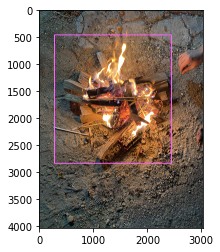

In [15]:
sample = cv2.imread(f'./이미지/원천데이터/불 지피기/모닥불/불 지피기_모닥불_Im10179957.jpg')
print(sample.shape)

image = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
image.flags.writeable = False

image = cv2.rectangle(image,(285,460),(2155+285,2375+460,),(255,100,255),15)
plt.imshow(image)

{"info":{"description":"불 지피기_모닥불 관련 이미지","version":"2022","class":{"depth1":"불 지피기","depth2":"모닥불"}},"license":{"agree":"Y","owner":"김금임","info":"이미지 공개 사용 동의"},"image":{"file_path":"image/불 지피기/모닥불","file_name":"불 지피기_모닥불_Im10179957.jpg","shooting_date":"2022-09-12","region_name":"전북 임실","description":"모닥불 관련 이미지","file_format":"JPG","file_size":4891464,"width":3024,"height":4032},"annotations":[{"id":1,"object":"모닥불 지피기","bbox":{"bndex_xcrdnt":285,"bndex_ycrdnt":460,"bndex_width":2155,"bndex_hg":2375}}]}

In [ ]:
# 전처리 및 파일 생성
# 폴더 이름 바꾸기!
import cv2
import json
from glob import glob
def padding(img, set_size):

    try:
        h,w,c = img.shape
        H = h
    except:
        print('파일을 확인후 다시 시작하세요.')
        raise

    if h < w:
        new_width = set_size
        new_height = int(new_width * (h/w))
    else:
        new_height = set_size
        new_width = int(new_height * (w/h))

    if max(h, w) < set_size:
        img = cv2.resize(img, (new_width, new_height), cv2.INTER_CUBIC)
    else:
        img = cv2.resize(img, (new_width, new_height), cv2.INTER_AREA)
    try:
        h,w,c = img.shape
    except:
        print('파일을 확인후 다시 시작하세요.')
        raise

    img_result=np.zeros((set_size,set_size, 3),dtype="uint8")
    # print(img_result.dtype,img.dtype)
    img_result[0:h,0:w]=img[:,:,:]
    ratio = h/H
    return img_result,ratio


file_list=glob("/content/cycle50/**/*.jpg", recursive=True)
# print(len(file_list))
for filename in file_list:
  img = cv2.imread(filename)
  label_name= filename.split("/")
  label_name[4]="라벨링데이터"
  label_name[-1]=label_name[-1].replace(".jpg",".json")
  label_name = "/".join(label_name)
  # print(label_name)
  with open(label_name, 'r') as f:

      json_data = json.load(f)

  bbox=json.dumps(json_data, ensure_ascii = False)
  bbox=json.loads(bbox)
  img,ratio = padding(img, 1280)
  h0,w0,c=img.shape
  crdnt_list = []
  for temp in bbox["annotations"]:
    x,y,w,h=int(temp["bbox"]["bndex_xcrdnt"]*ratio),int(temp["bbox"]["bndex_ycrdnt"]*ratio),int(temp["bbox"]["bndex_width"]*ratio),int(temp["bbox"]["bndex_hg"]*ratio)
    x,y=x+w//2,y+h//2
    crdnt_list.append([round(x/w0,6),round(y/h0,6),round(w/w0,6),round(h/h0,6)])

  tempbox=filename.split("/")[7].split("_")
  # print("label:",label_list.index(tempbox[0]+"_"+tempbox[1]))
  with open("/content/data/labels/"+filename.split("/")[-1].replace(".jpg",".txt"), 'w') as f:
    for temp in crdnt_list:
      f.writelines(str(label_list.index(tempbox[0]+"_"+tempbox[1]))+" "+" ".join(map(str, temp)))

  cv2.imwrite("/content/data/images/"+filename.split("/")[-1],img)


# for temp in crdnt_list:
#   print(temp)
#   img = cv2.rectangle(img,(int(w0*(temp[0]-temp[2]/2)),int(h0*(temp[1]-temp[3]/2))),(int(w0*(temp[0]+temp[2]/2)),int(h0*(temp[1]+temp[3]/2))),(0,0,0),10)
# plt.imshow(img)